In [ ]:
pip install mpl-finance

In [ ]:
pip install pandas-datareader

In [20]:
from pandas_datareader import data 
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
from matplotlib.dates import date2num
from mpl_finance import candlestick_ohlc as candlestick
import datetime

ticker = 'GLD'
begdate = '2014-11-11'
enddate = '2016-11-11'
sec_id = data.DataReader(ticker,'yahoo',datetime.datetime(2014,11,11),datetime.datetime(2016,11,11))


In [25]:
sec_id

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-11-11,112.760002,110.870003,111.080002,112.040001,8603200,112.040001
2014-11-12,112.169998,111.230003,112.050003,111.500000,5133300,111.500000
2014-11-13,112.260002,111.220001,111.889999,111.669998,4874600,111.669998
2014-11-14,114.720001,110.650002,110.760002,114.470001,14173600,114.470001
2014-11-17,114.269997,113.559998,113.970001,114.050003,5441000,114.050003
...,...,...,...,...,...,...
2016-11-07,122.709999,121.879997,122.660004,122.150002,10015000,122.150002
2016-11-08,123.089996,121.360001,122.120003,121.639999,9480600,121.639999
2016-11-09,124.349998,121.110001,124.300003,121.559998,18236500,121.559998


In [23]:

# Data for matplotlib finance plot
sec_id_ochl = np.array(pd.DataFrame({'0':date2num(sec_id.index.to_pydatetime()),
                                  '1':sec_id.Open,
                                  '2':sec_id.Close,
                                  '3':sec_id.High,
                                  '4':sec_id.Low}))


In [ ]:
sec_id_ochl

In [26]:
# Technical Analysis
SMA_FAST = 50
SMA_SLOW = 200
RSI_PERIOD = 14
RSI_AVG_PERIOD = 15
MACD_FAST = 12
MACD_SLOW = 26
MACD_SIGNAL = 9
STOCH_K = 14
STOCH_D = 3
SIGNAL_TOL = 3
Y_AXIS_SIZE = 12


In [27]:
analysis = pd.DataFrame(index = sec_id.index)

In [33]:
analysis['sma_f'] = ta.SMA(sec_id.Close, SMA_FAST)
analysis['sma_s'] = ta.SMA(sec_id.Close, SMA_SLOW)
analysis['rsi'] = ta.RSI(sec_id.Close, RSI_PERIOD)
analysis['sma_r'] = ta.SMA(analysis.rsi, RSI_AVG_PERIOD) # check shift
analysis['macd'], analysis['macdSignal'], analysis['macdHist'] = ta.MACD(sec_id.Close, fastperiod=MACD_FAST, slowperiod=MACD_SLOW, signalperiod=MACD_SIGNAL)
analysis['stoch_k'], analysis['stoch_d'] = ta.STOCH(sec_id.High, sec_id.Low, sec_id.Close, slowk_period=STOCH_K, slowd_period=STOCH_D)

analysis['sma'] = np.where(analysis.sma_f > analysis.sma_s, 1, 0)
analysis['macd_test'] = np.where((analysis.macd > analysis.macdSignal), 1, 0)
analysis['stoch_k_test'] = np.where((analysis.stoch_k < 50) & (analysis.stoch_k > analysis.stoch_k.shift(1)), 1, 0)
analysis['rsi_test'] = np.where((analysis.rsi < 50) & (analysis.rsi > analysis.rsi.shift(1)), 1, 0)


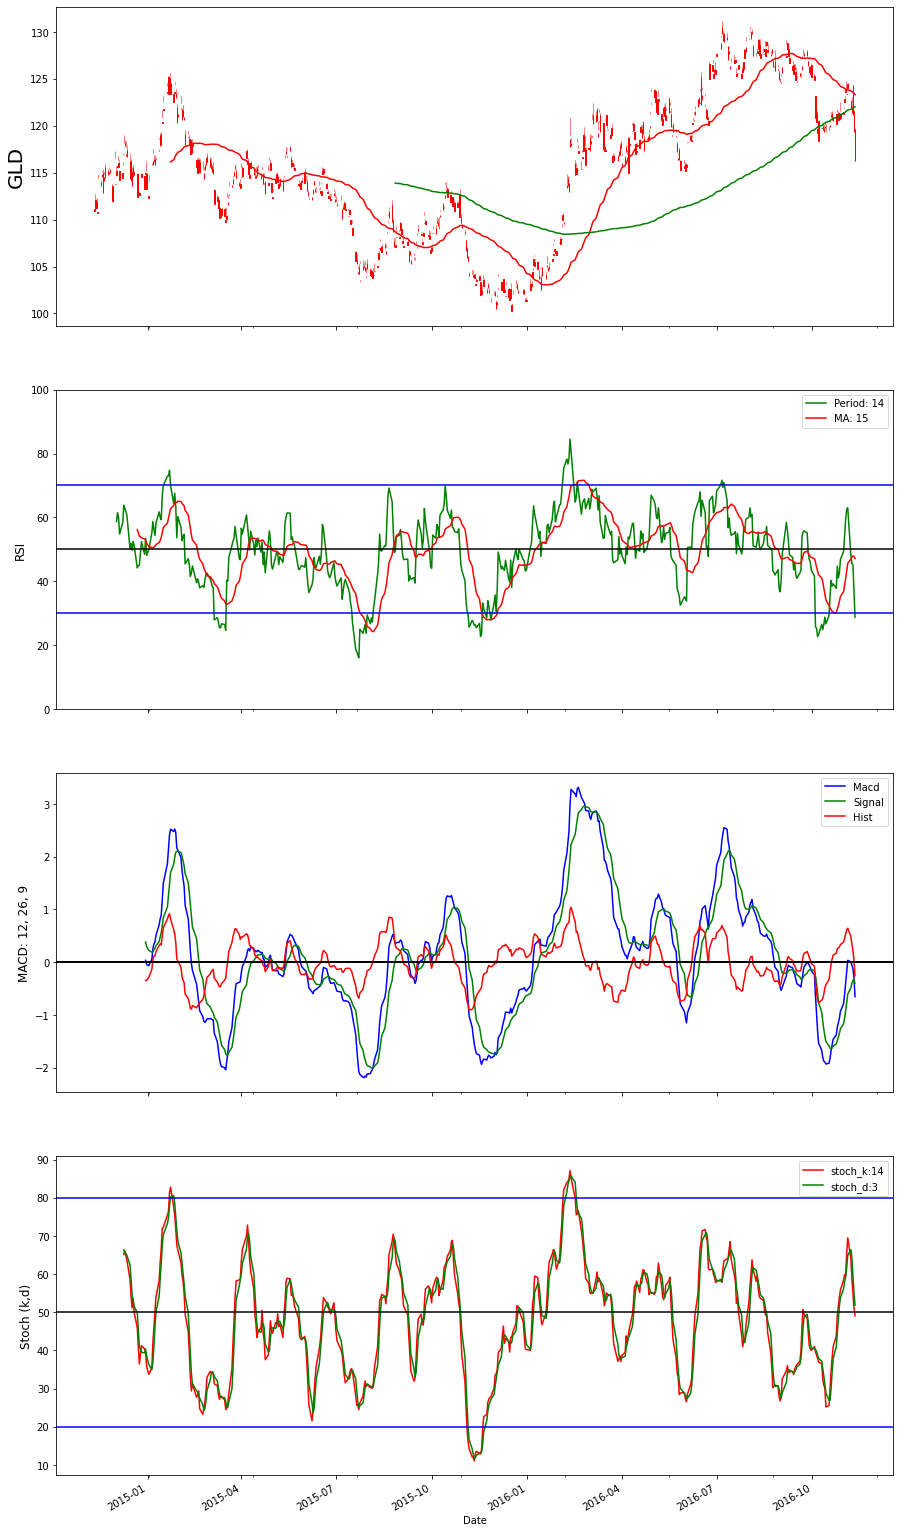

In [34]:
# Prepare plot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
ax1.set_ylabel(ticker, size=20)

#size plot
fig.set_size_inches(15,30)

# Plot candles
candlestick(ax1, sec_id_ochl, width=0.5, colorup='g', colordown='r', alpha=1)

# Draw Moving Averages
analysis.sma_f.plot(ax=ax1, c='r')
analysis.sma_s.plot(ax=ax1, c='g')

#RSI
ax2.set_ylabel('RSI', size=Y_AXIS_SIZE)
analysis.rsi.plot(ax = ax2, c='g', label = 'Period: ' + str(RSI_PERIOD))
analysis.sma_r.plot(ax = ax2, c='r', label = 'MA: ' + str(RSI_AVG_PERIOD))
ax2.axhline(y=30, c='b')
ax2.axhline(y=50, c='black')
ax2.axhline(y=70, c='b')
ax2.set_ylim([0,100])
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels)

# Draw MACD computed with Talib
ax3.set_ylabel('MACD: '+ str(MACD_FAST) + ', ' + str(MACD_SLOW) + ', ' + str(MACD_SIGNAL), size=Y_AXIS_SIZE)
analysis.macd.plot(ax=ax3, color='b', label='Macd')
analysis.macdSignal.plot(ax=ax3, color='g', label='Signal')
analysis.macdHist.plot(ax=ax3, color='r', label='Hist')
ax3.axhline(0, lw=2, color='0')
handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles, labels)

# Stochastic plot
ax4.set_ylabel('Stoch (k,d)', size=Y_AXIS_SIZE)
analysis.stoch_k.plot(ax=ax4, label='stoch_k:'+ str(STOCH_K), color='r')
analysis.stoch_d.plot(ax=ax4, label='stoch_d:'+ str(STOCH_D), color='g')
handles, labels = ax4.get_legend_handles_labels()
ax4.legend(handles, labels)
ax4.axhline(y=20, c='b')
ax4.axhline(y=50, c='black')
ax4.axhline(y=80, c='b')

plt.show()